In [41]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#load dataset

data=pd.read_csv("scores_data.csv")
data.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [6]:
data.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [7]:
data.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

Analysis of data

In [18]:
batch=data["Batch "].value_counts()
batch

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch , dtype: int64

Text(0.5, 1.0, 'Horizontal Bar Plot')

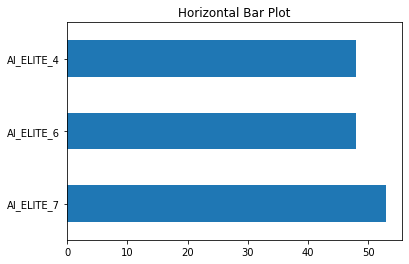

In [38]:
batch.plot.barh()
plt.title("Horizontal Bar Plot")

In [31]:
data.rename(columns = {'   Score   ':'score'}, inplace = True) 
data["marks"] = data.score.str[:].str[0:1]
data.marks = data.marks.astype("int")

In [32]:
df = data.copy()
df = df[df["marks"] >=4]

Count plot to see the marks distribution in each batch

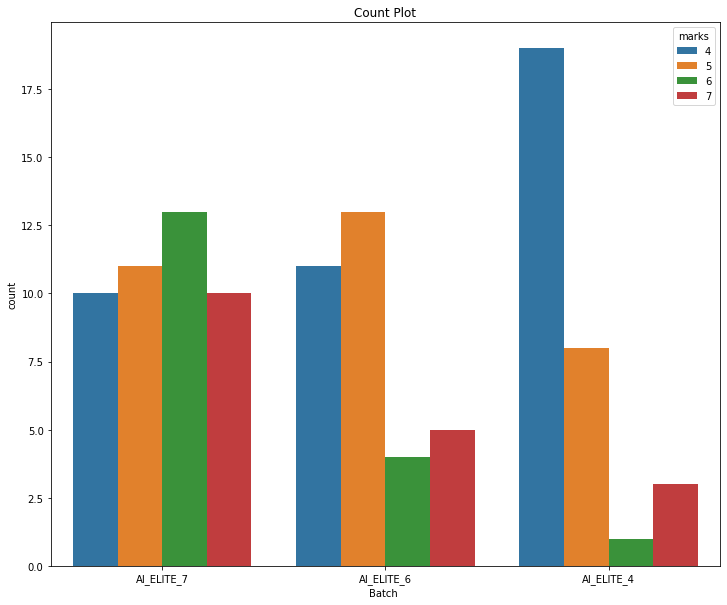

In [34]:
plt.figure(figsize=(12, 10))
sns.countplot(x = df["Batch "], hue = df["marks"])
plt.title('Count Plot')
plt.show()


Batch-wise Avarage Marks

In [36]:
grp=df.groupby("Batch ")["marks"].mean().reset_index()
grp

,Batch,marks
0,AI_ELITE_4,4.612903
1,AI_ELITE_6,5.090909
2,AI_ELITE_7,5.522727


We can infer that batch-AI_ELITE_7 candidates has more avarage marks i.e. 5.056 out of 7

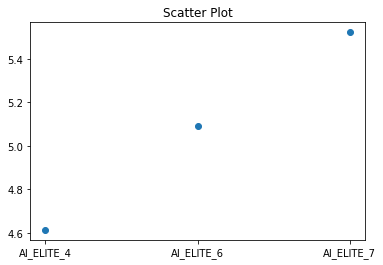

In [37]:
plt.scatter(grp["Batch "], grp["marks"])
plt.title("Scatter Plot")
plt.show()